In [17]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend, EColor

In [26]:
x =  ( 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5., 5.5, 6., 6.5, 7.)
vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
def getcolor(i) :
    return  99 - (i * 3)

In [3]:
canv = TCanvas("c1", "" ,700, 600);
canv.SetGrid()
canv_tmp = TCanvas("ctmp", "" ,700, 600);

In [4]:
gStyle.SetEndErrorSize(0)
range_up = 1.1
marker_size = 1.1
marker_style = 21

In [33]:
canv.cd();
def DrawTrigPTSeq(trigDir, canv,  _leg = 0, _header = "") :
    canv.Clear();
    canv.SetGrid()
    canv.cd();
    # leg = TLegend(0.5, 0.2, 0.8, 0.45)
    _leg.SetBorderSize(0)
    _leg.SetNColumns(2)
    _leg.SetHeader( _header )
    first = True;
    for i in reversed(range(len(x))):
        hist = trigDir.Get('pt_%dp%d' % (int(x[i]), int(10 *(x[i] - int(x[i]) ))))
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        if( (hist.IsA()).GetName() == "TEfficiency") :
            hist = hist.GetPaintedGraph()
        canv.cd()
        hist.SetLineColor( vcol[i] )
        hist.SetMarkerColor( vcol[i] )
        hist.SetMarkerSize(marker_size)
        hist.SetMarkerStyle(marker_style)
        hist.GetYaxis().SetRangeUser(0,range_up)
        hist.GetYaxis().SetNdivisions(int(range_up *10))
        hist.GetXaxis().SetRangeUser(0,50)
        hist.GetXaxis().SetNdivisions(25)
        hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
        hist.GetYaxis().SetTitle("Efficiency")
        hist.Draw( "APE" if first else "PE")
        leg.AddEntry(hist, "pt > %.1f" % x[i])
        first = False
    leg.DrawClone()
    canv.Draw()
    return canv, leg

def DrawTrigOne(trigDir, obj, canv, _and = False, _col = 221) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
#    canv_tmp.cd()
#    hist.Draw()
#    canv_tmp.Update()
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")
    if( _and ) :
        print("and")
        hist.Draw( "PE" )
    else : 
        hist.Draw( "APE" )
    
    canv.Draw()
    return canv

def DrawTrigSeq(trigDir, obj, canv, _and = False, _col = 221, _leg = 0, _disc = "") :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")

    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "PE" )
    else : 
        hist.Draw( "APE" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

In [13]:
# f_out = TFile.Open("output_Data2018_newMenu.root")
# f_out = TFile.Open("output_Data2018_newMenudRCut0p3.root")
f_out1 = TFile.Open("output_Data2018_v2_6.root")
# f_out2 = TFile.Open("output_Data2018_v2_7_mod1.root")
# f_out2 = TFile.Open("output_JPsiEMB_v2_9.root")
f_out2 = TFile.Open("output_JPsiEMB_v2_9_test2.root")
f_out3 = TFile.Open("output_JPsiEMB_v2_9.root")

ver1 = "v2_9"
pltdir = "Eff_%s" % ver1
ver = "JPsiEMB" + ver1

In [7]:
f_leg = TFile.Open("output_Data2018_LegacydR0p3.root")

In [8]:
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)

Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pt_L1DoubleMuOpen_Comp_JPsiEMBv2_9.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pt_L2DoubleMuOpen_Comp_JPsiEMBv2_9.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pt_L3DoubleMuOpen_Comp_JPsiEMBv2_9.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pt_DoubleMuOpenMass_Comp_JPsiEMBv2_9.pdf has been created


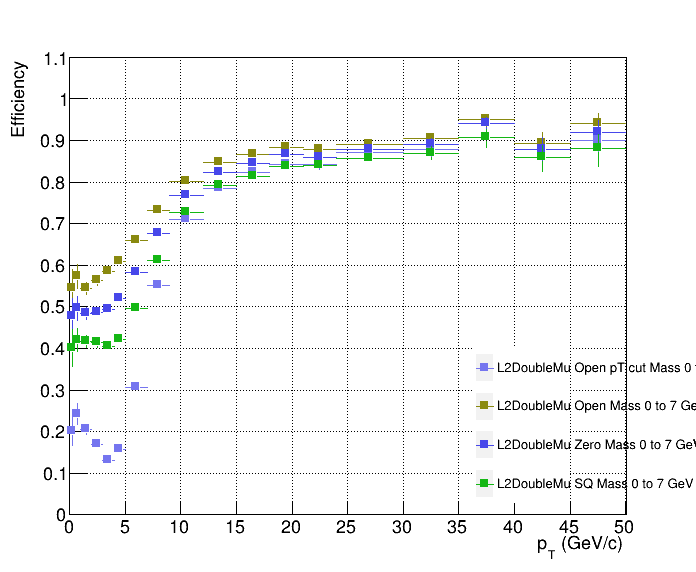

In [16]:


leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMuOpen %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L1DoubleMuZero %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L1DoubleMu SQ %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L1DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L2DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L2DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMuOpen %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMuZero %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L2DoubleMu SQ %s" % ver1)

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.SetX1(0.17)
leg.SetNColumns(2)
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L2DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L3DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L3DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "dR <0.1 L3DoubleMuOpen %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "dR <0.1 L3DoubleMuZero %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "dR <0.1 L3DoubleMu SQ %s" % ver1)
canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = 219, _leg = leg, _disc = "dR <0.3 L3DoubleMuOpen %s" % ver1)
# canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 215, _leg = leg, _disc = "dR <0.3 L3DoubleMuZero %s" % ver1)
# canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 98, _leg = leg, _disc = "dR <0.3 L3DoubleMu SQ %s" % ver1)

#canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.52);leg.SetX2(0.82);leg.SetY1(0.12);leg.SetY2(0.39);
leg.SetNColumns(1)
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L3DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen_drMax3p5M0to7_Open"), 'pt_3p5', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_3p5', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_3p5', canv, _and = True, _col = 95, _leg = leg, _disc = "L3DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

#canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.68);leg.SetX2(0.82);leg.SetY1(0.12);leg.SetY2(0.39);
leg.SetNColumns(1)
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_DoubleMuOpenMass_Comp_%s.pdf" % (pltdir, ver) )

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_2p5', canv, _and = False, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_2p5', canv, _and = False, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt_2p5', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMu Open pT cut Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = True, _col = 218, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L2DoubleMu Zero Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMu SQ Mass 0 to 7 GeV %s" % ver1)
leg.DrawClone()
canv.Draw()


Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L2DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L2DoubleMuZero.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L2DoubleMuSQ.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L3DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L3DoubleMuZero.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_9/Eff_pTSpectrum_L3DoubleMuSQ.pdf has been created


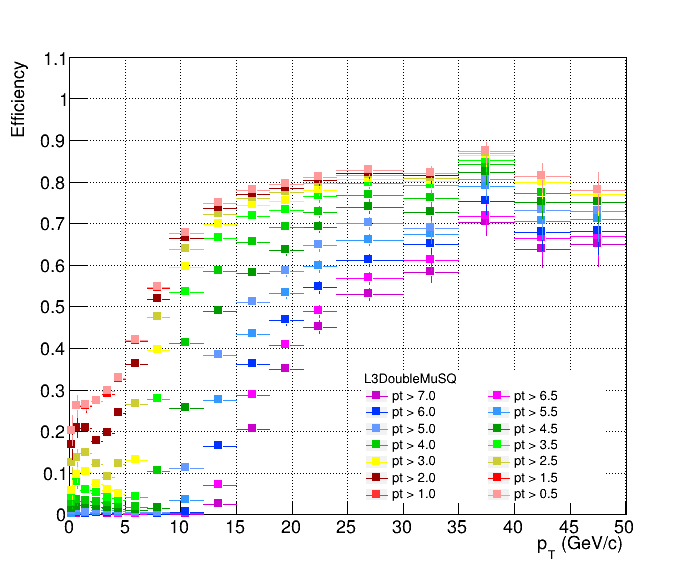

In [36]:
leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg )
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )


Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp_MassCut_v2_7_mod1.pdf has been created


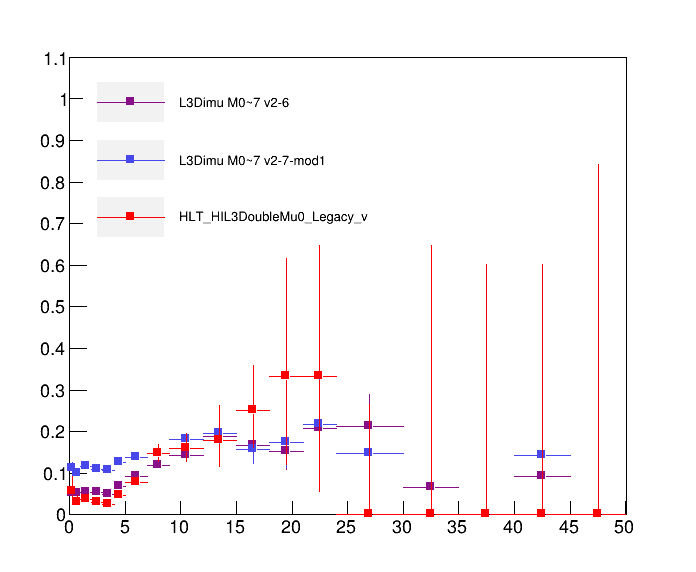

In [58]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3Dimu M0~7 v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3Dimu M0~7 v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetY1(0.57);leg.SetY2(0.87);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp_MassCut_v2_7_mod1.pdf has been created


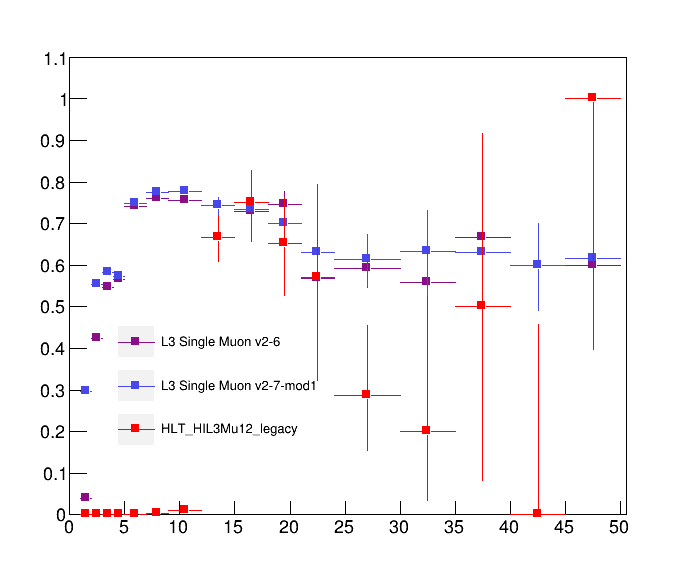

In [59]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("HLT_HIL3Mu0_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3 Single Muon v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3Mu0_v"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3 Single Muon v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3Mu12_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3Mu12_legacy")
leg.SetY1(0.21);leg.SetY2(0.44);
leg.SetX1(0.16);leg.SetX2(0.45);

leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

In [18]:
if f_out1.IsOpen()  : f_out1.Close()
if f_out2.IsOpen()  : f_out2.Close()
f_out1 = TFile.Open("output_Data2018_v2_6.root")
f_out2 = TFile.Open("output_Data2018_v2_7_mod1.root")

In [ ]:
ver = "v2_7_mod1"
pltdir = "Eff_JPsiHydjet_v220530"
leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.12);leg.SetX2(0.67);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMuOpen new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L1DoubleMuZero new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L1DoubleMu SQ")# v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L1DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L2DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L2DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L2DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.SetX1(0.17)
leg.SetNColumns(2)
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L2DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L3DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L3DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L3DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L3DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L3DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.12);leg.SetY1(0.62);leg.SetY2(0.89);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L3DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
